# World Income Distribution

Comparing countries against each other via Global Income Distribution percentiles

## Import

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
sns.set()

In [47]:
import matplotlib.ticker as ticker

In [48]:
import matplotlib.style as style

In [49]:
style.use('fivethirtyeight')

## HELPER FUNCTION

We will use this function to convert PPP dollar input to percentile of world income (circa 2013)

In [4]:
percentiles = pd.read_csv('figure5data.csv')

In [5]:
percentiles.drop(percentiles.tail(1).index,inplace=True)

In [6]:
def get_percentile(income):
  for j in range(len(percentiles)):
    if percentiles['midpoint'].iloc[j] > income:
      return(percentiles.iloc[j]['c2013'])

Example use, confirmation it works:

In [7]:
get_percentile(10000)

84.3856327945172

## Explore

In [8]:
df = pd.read_csv('wyd_88_05_for_release.csv')

All the countries for which we have data:

In [9]:
df['contcod'].unique()

array(['AGO', 'ALB', 'ANT', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGD-R', 'BGD-U', 'BGR', 'BIH',
       'BLR', 'BOL', 'BRA', 'BRB', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE',
       'CHL', 'CHN', 'CHN-R', 'CHN-U', 'CIV', 'CMR', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CYP', 'CZE', 'DDR', 'DEU', 'DJI', 'DNK', 'DOM',
       'DZA', 'ECU', 'ECU-U', 'EGY', 'EGY-R', 'EGY-U', 'ESP', 'EST',
       'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB',
       'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN',
       'IDN', 'IDN-R', 'IDN-U', 'IND', 'IND-R', 'IND-U', 'IRL', 'IRN',
       'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KOR', 'LAO', 'LBR', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR',
       'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE', 'MNG', 'MNG-R', 'MNG-U',
       'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NER', 'NER-R', 'NER-U', 'NGA',
       'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PAN', 'PER', 'PER-U',
  

Country codes lookup: https://wits.worldbank.org/wits/wits/witshelp/content/codes/country_codes.htm

In [132]:
df['contcod'].unique().size

169

All the countries that have 2005 data:

In [130]:
df.loc[df['year'] == 2005]['contcod'].unique()

array(['AGO', 'ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHE',
       'CHL', 'CHN', 'CHN-R', 'CHN-U', 'CIV', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP',
       'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN',
       'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IDN-R',
       'IDN-U', 'IND', 'IND-R', 'IND-U', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBR',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD',
       'MLI', 'MNE', 'MNG', 'MOZ', 'MWI', 'MYS', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT',
       'PRY', 'ROM', 'RUS', 'SEN', 'SLE', 'SLV', 'SRB', 'SVK', 'SVN',
       'SWE', 'TCD', 'TGO', 'THA', 'TJK', 'TKM', 'TUN', 'TUR', 'TWN',
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAR', 'ZMB'],
      dtype=ob

In [131]:
df.loc[df['year'] == 2005]['contcod'].unique().size

125

In [11]:
df.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop
0,AGO,6,1998,1,1,1,1,45.023155,1.24
1,AGO,6,1998,1,1,1,2,74.135872,1.24
2,AGO,6,1998,1,1,1,3,96.224304,1.24


### Many countries at once

We will attempt to replicate a graph from Branko Milanovic.

Let's select Brazil, India, China, and Germany

In [13]:
countries = ['BRA', 'IND', 'CHN', 'DEU']

In [14]:
several = df.loc[df['contcod'].isin(countries)]

In [15]:
only2005 = several.loc[several['year'] == 2005]

Plot it all to see whether all the data is all there.

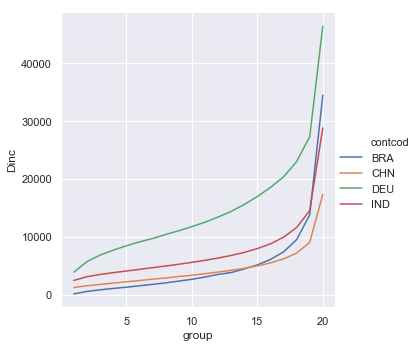

In [16]:
sns.relplot(x="group", y="Dinc", kind="line", hue="contcod", legend="full", data=only2005);

In [17]:
only2005['percentile'] = only2005.apply(lambda x: get_percentile(x['Dinc']), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


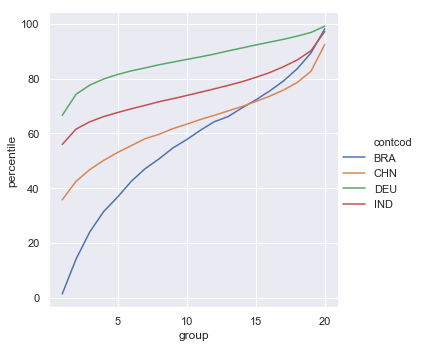

In [18]:
sns.relplot(x="group", y="percentile", kind="line", hue="contcod", legend="full", data=only2005);

*WARNING* -- the graph does not match WYD graph from Branko Milanovic -- India and China here start much higher than in the published chart. 

This is because `Dinc` is expressed in the country's currency rather than PPP, we'll need to convert

*NOTE:* `./data/API_PA.NUS.PPP_DS2_en_csv_v2_10578402.csv` was renamed and cleaned as `./ppp.csv`

In [19]:
ppp = pd.read_csv('ppp.csv')

In [20]:
ppp.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,1.247673,1.260119,1.246163,1.197089,1.195737,1.207233,1.176832,1.162809,NaN,NaN
1,Afghanistan,AFG,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,15.197030,17.356170,18.273028,18.823950,18.579175,18.832529,19.579392,19.588412,NaN,NaN
2,Angola,AGO,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,52.926370,68.314856,71.892794,72.659247,73.849371,70.497210,84.918868,102.180626,NaN,NaN


In [21]:
ppp = ppp[['Country Code', '2005']]

In [22]:
ppp.head(3)

,Country Code,2005
0,ABW,1.185661
1,AFG,12.277329
2,AGO,36.433479


In [23]:
ppp.columns = ['code', '2005']

In [24]:
ppp.head(3)

,code,2005
0,ABW,1.185661
1,AFG,12.277329
2,AGO,36.433479


Now we are ready to work!

Let's create a function that returns the conversion factor!

In [25]:
def conversion_factor(code):
  # find row with exact code match, select 2005 column, grab first value (the only one there is)
  return ppp.loc[ppp['code'] == code]['2005'].iloc[0]

In [26]:
conversion_factor('IND')

10.423281440856401

In [27]:
conversion_factor('ABW')

1.18566122280955

Let's add the conversion factor into our dataframe

In [28]:
only2005['ppp_factor'] = only2005.apply(lambda x: conversion_factor(x['contcod']), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
only2005.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop,percentile,ppp_factor
1051,BRA,27,2005,3,0,1,1,137.849854,9.3415,1.430303,1.060634
1052,BRA,27,2005,3,0,1,2,567.420593,9.3415,14.158927,1.060634
1053,BRA,27,2005,3,0,1,3,840.334290,9.3415,24.110783,1.060634


In [30]:
only2005.tail(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop,percentile,ppp_factor
4171,IND,89,2005,2,1,1,18,11602.4,54.729,86.772376,10.423281
4172,IND,89,2005,2,1,1,19,14546.9,54.729,90.164465,10.423281
4173,IND,89,2005,2,1,1,20,28810.1,54.729,97.182436,10.423281


Now we just have to create a new column (let's call it `ppp_2005`) multiplying the `Dinc` by `ppp_factor`

In [31]:
only2005['ppp_2005'] = only2005.apply(lambda x: x['Dinc'] / x['ppp_factor'], axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
only2005.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop,percentile,ppp_factor,ppp_2005
1051,BRA,27,2005,3,0,1,1,137.849854,9.3415,1.430303,1.060634,129.969242
1052,BRA,27,2005,3,0,1,2,567.420593,9.3415,14.158927,1.060634,534.982249
1053,BRA,27,2005,3,0,1,3,840.334290,9.3415,24.110783,1.060634,792.293994


In [33]:
only2005.tail(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop,percentile,ppp_factor,ppp_2005
4171,IND,89,2005,2,1,1,18,11602.4,54.729,86.772376,10.423281,1113.123546
4172,IND,89,2005,2,1,1,19,14546.9,54.729,90.164465,10.423281,1395.616158
4173,IND,89,2005,2,1,1,20,28810.1,54.729,97.182436,10.423281,2764.014400


In [34]:
only2005[only2005['contcod'] == 'DEU'][['contcod', 'pop', 'Dinc', 'percentile']].head(3)

,contcod,pop,Dinc,percentile
2236,DEU,4.124,3909.0,66.576520
2237,DEU,4.124,5723.0,74.275849
2238,DEU,4.124,6846.0,77.628908


*WARNING* -- note that *China* has unequal population across its 'ventiles' -- this needs to be rectified before graphing, which currently has not been done!

In [128]:
only2005[only2005['contcod'] == 'CHN'][['contcod', 'pop', 'Dinc', 'percentile']].head(20)

,contcod,pop,Dinc,percentile
1481,CHN,39.917702,1245.482669,35.746791
1482,CHN,39.004551,1547.778511,42.535700
1483,CHN,39.395901,1780.291985,46.807735
1484,CHN,39.917702,2001.668576,50.162916
1485,CHN,40.700401,2224.931609,53.027131
1486,CHN,41.483101,2439.769623,55.532087
1487,CHN,42.526699,2693.042446,58.066825
1488,CHN,43.700748,2884.792801,59.662511
1489,CHN,45.266151,3138.062551,61.720337
1490,CHN,46.831551,3355.443312,63.336679


In [36]:
only2005[only2005['contcod'] == 'IND'][['contcod', 'pop', 'Dinc', 'percentile']].head(3)

,contcod,pop,Dinc,percentile
4154,IND,54.729,2473.5,55.951485
4155,IND,54.729,3116.2,61.570595
4156,IND,54.729,3496.2,64.247171


Now let's convert `ppp_2005` to `ppp_percentile`

In [37]:
only2005['ppp_percentile'] = only2005.apply(lambda x: get_percentile(x['ppp_2005']), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### GRAPH AGAIN!!!

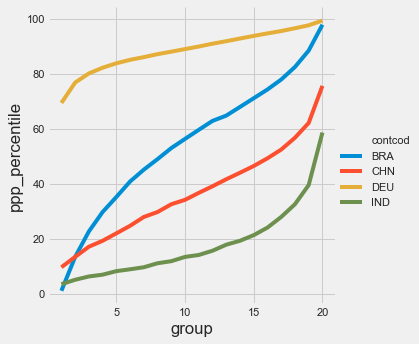

In [174]:
sns.relplot(x="group", y="ppp_percentile", kind="line", hue="contcod", legend="full", data=only2005);

It now looks how it should (minus the unfixed 'ventiles' for China)

Let's fix data for China! Plan:

1. generate a cumulative population column from `pop`
2. compute total population from `pop`
3. generate a column with the midpoints of each `pop` as percentile location. 

In [141]:
def compute_total_pop(country_code):
  return only2005[only2005['contcod'] == country_code]['pop'].sum()

In [142]:
compute_total_pop('CHN')

1304.500011444092

In [150]:
only2005['cum_pop'] = only2005[only2005['contcod'] == 'CHN']['pop'].cumsum()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
only2005[only2005['contcod'] == 'CHN'][['contcod', 'pop', 'cum_pop']]

,contcod,pop,cum_pop
1481,CHN,39.917702,39.917702
1482,CHN,39.004551,78.922253
1483,CHN,39.395901,118.318153
1484,CHN,39.917702,158.235855
1485,CHN,40.700401,198.936256
1486,CHN,41.483101,240.419357
1487,CHN,42.526699,282.946056
1488,CHN,43.700748,326.646805
1489,CHN,45.266151,371.912956
1490,CHN,46.831551,418.744507


The formula:
1. divide cumulative population by total (to get percentile)
2. subtract half the fractile size from the resulting number
3. multiply by 100 to get percentile

In [171]:
only2005['cum_perc'] = 100 * (
  (only2005[only2005['contcod'] == 'CHN']['cum_pop']) / compute_total_pop('CHN') - (
    ((only2005[only2005['contcod'] == 'CHN']['pop']) / 2) / compute_total_pop('CHN')
  )
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
only2005[only2005['contcod'] == 'CHN'][['contcod', 'pop', 'cum_pop', 'cum_perc']]

,contcod,pop,cum_pop,cum_perc
1481,CHN,39.917702,39.917702,1.530
1482,CHN,39.004551,78.922253,4.555
1483,CHN,39.395901,118.318153,7.560
1484,CHN,39.917702,158.235855,10.600
1485,CHN,40.700401,198.936256,13.690
1486,CHN,41.483101,240.419357,16.840
1487,CHN,42.526699,282.946056,20.060
1488,CHN,43.700748,326.646805,23.365
1489,CHN,45.266151,371.912956,26.775
1490,CHN,46.831551,418.744507,30.305


Plot again -- with `cum_perc`

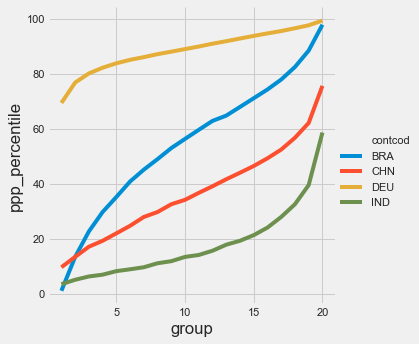

In [175]:
sns.relplot(x="group", y="ppp_percentile", kind="line", hue="contcod", legend="full", data=only2005);

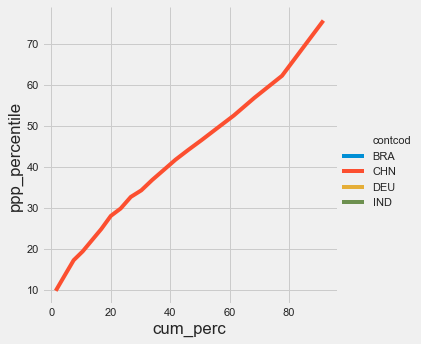

In [176]:
sns.relplot(x="cum_perc", y="ppp_percentile", kind="line", hue="contcod", legend="full", data=only2005);

Success! The graph for China has been adjusted to include sizes of each fractile!

# Make it PRETTY!

`group` goes from 1 to 20 but we'd rather portray it as percentiles.

Let's make a new column converting the values!

Multiply by 5 (to get: 5, 10, ..., 100) and subtract 2.5 to get midpoints for each ventile.

In [61]:
only2005['group_100'] = only2005.apply(lambda x: x['group'] * 5 - 2.5, axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
only2005.tail(5)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop,percentile,ppp_factor,ppp_2005,ppp_percentile,group_100
4169,IND,89,2005,2,1,1,16,8785.2,54.729,82.161720,10.423281,842.843979,24.110783,77.5
4170,IND,89,2005,2,1,1,17,9930.1,54.729,84.287588,10.423281,952.684628,27.977143,82.5
4171,IND,89,2005,2,1,1,18,11602.4,54.729,86.772376,10.423281,1113.123546,32.603788,87.5
4172,IND,89,2005,2,1,1,19,14546.9,54.729,90.164465,10.423281,1395.616158,39.574003,92.5
4173,IND,89,2005,2,1,1,20,28810.1,54.729,97.182436,10.423281,2764.014400,58.668801,97.5


US Poverty guidelines:

https://aspe.hhs.gov/prior-hhs-poverty-guidelines-and-federal-register-references



2005:  `$9,570`

2013:  `$11,490`


In [85]:
get_percentile(9570)

83.66511227257979

In [103]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255]]
#           [213/255,94/255,0], [0,114/255,178/255]]

Text(20, 75, 'INFORMATION MAY BE INACCURATE')

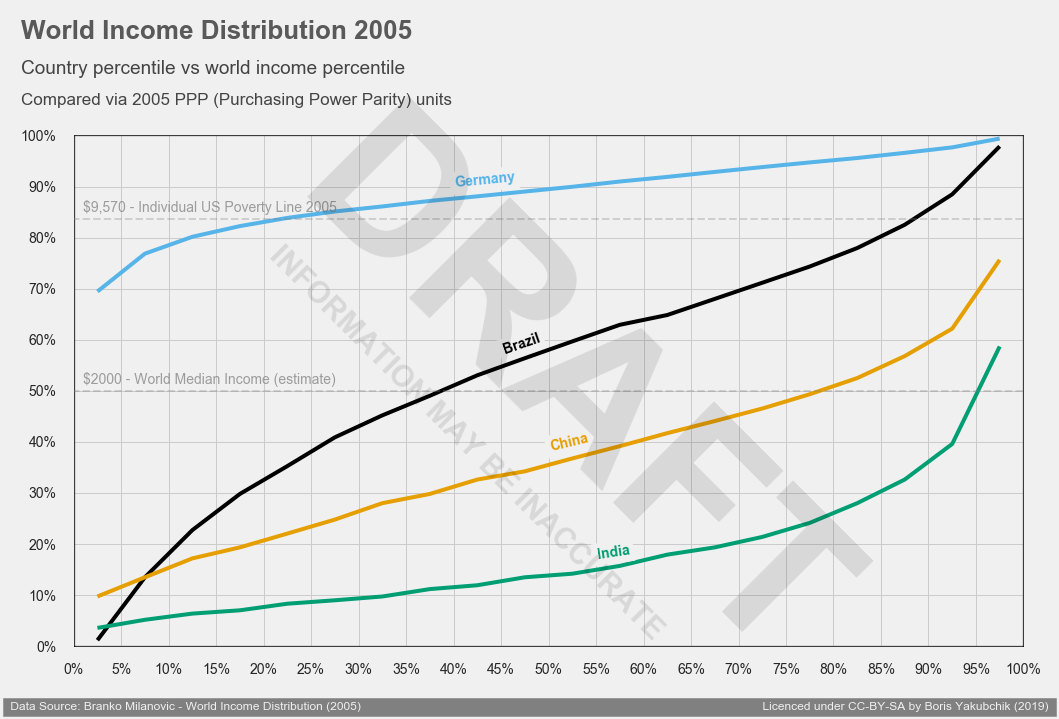

In [127]:
chart = sns.relplot(
  x="group_100", 
  y="ppp_percentile",
  kind="line", 
  hue="contcod",
  data=only2005,
  palette=colors,
  legend=False,
  height=8,
  aspect=16/9
)

chart.axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(10))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = 0, 
  y = 123, 
  s = " ")

chart.axes[0][0].text(
  x = -5.5, 
  y = 119, 
  s = "World Income Distribution 2005",
     fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -5.5, 
  y = 112,
  s = 'Country percentile vs world income percentile',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -5.5, 
  y = 106,
  s = 'Compared via 2005 PPP (Purchasing Power Parity) units',
  fontsize = 17, alpha = .85)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['{:,.0f}'.format(y) + '%' for y in ticks_y]
chart.set_yticklabels(ylabels)

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom
chart.axes[0][0].axhline(y = 100,   color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on top

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# USD poverty threshold 2013 - horizontal
chart.axes[0][0].axhline(y = 83.66, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
chart.axes[0][0].text(
  x = 1, 
  y = 85, 
  s = "$9,570 - Individual US Poverty Line 2005",
  color = 'gray',
  fontsize = 14, 
  alpha = .75)

chart.axes[0][0].axhline(y = 50, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
chart.axes[0][0].text(
  x = 1, 
  y = 51.34, 
  s = "$2000 - World Median Income (estimate)",
  color = 'gray',
  fontsize = 14, 
  alpha = .75)

chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-0.4, 100.1)
chart.axes[0][0].set_xlim(-0.2, 100.1)

# SIGNATURE BAR
chart.axes[0][0].text(
    x = -7, 
    y = -12.5,
    s = ' Data Source: Branko Milanovic - World Income Distribution (2005)                                                                                                                       Licenced under CC-BY-SA by Boris Yakubchik (2019) ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

chart.axes[0][0].text(x = 40, y = 91, s = 'Germany', color = colors[2], weight = 'bold', rotation = 5.5,
               backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 45, y = 59.5, s = 'Brazil', color = colors[0], weight = 'bold', rotation = 19,
              backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 50, y = 40, s = 'China', color = colors[1], weight = 'bold', rotation = 13.5,
              backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 55, y = 18, s = 'India', color = colors[3], weight = 'bold', rotation = 8.5,
              backgroundcolor = '#f0f0f0')

chart.axes[0][0].text(x = 20, y= 80, s = 'DRAFT', color='black', weight='bold', rotation=-45, alpha=0.1, size=200)
chart.axes[0][0].text(x = 20, y= 75, s = 'INFORMATION MAY BE INACCURATE', color='black', weight='bold', rotation=-45, alpha=0.1, size=30)